<div class="alert alert-info" role="alert"><b>Prerequisites:</b> <a href="https://www.continuum.io/downloads">Anaconda (Python 3.x)</a> and <a href="https://git-scm.com/">Git</a> need to be installed on your computer. The astronomy department offers desktops in Angell Hall (5180A and 5190) and on the 4th Floor of West Hall (the undergraduate "lab") with the prerequisite software installed.</div>

Before proceeding with this notebook, make sure you have read through the [Git introduction document](readme.md) and set up your BitBucket account.

## Jupyter notebook

A Jupyter notebook is an interactive environment that allows you to write and execute code snippets, as well as write explanatory text (including equations and visualizations) to augment your code. Formerly known as iPython notebooks, Jupyter notebooks retain the `.ipynb` file extension (although Jupyter notebooks can be used with programming languages besides python as well).  A breif introduction to the user interface can be found [here](http://nbviewer.jupyter.org/github/ipython/ipython-in-depth/blob/master/examples/Notebook/Notebook%20Basics.ipynb).

To launch Jupyter, first open a terminal emulator.  Navigate to the directory containing the Jupyter notebook you want to work on and then enter the command

    jupyter notebook

This will launch a Jupyter session in your web browser.  From here, you can select the notebook(s) you want to interact with.  To execute a cell, press <kbd>Ctrl</kbd>-<kbd>Enter<

This notebook is designed for astronomers or future astronomers with little or no programming skills.  Some prior knowledge about the command-line and using a termimal to run code and manage programs and data is very helpful.

As you work through this tutorial, you should try and break it. After you download it, the file belongs to you. Please mess with it. Enter the code and markdown blocks. Change the numbers. Type <kbd>shift</kbd>+<kbd>tab</kbd> (twice) on code commands/functions that you don't understand. *Learn by doing.*

Here is an **image** of M42 I found on the internet (*credit [NOAO](https://www.noao.edu/image_gallery/images/d3/02677a.jpg)*):

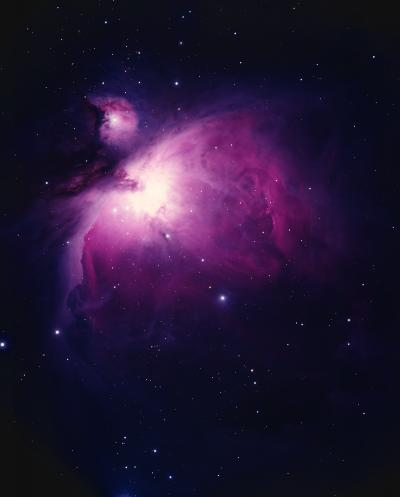

In [1]:
from IPython.display import Image
Image(filename='02677a.jpg')

In [2]:
print("Behold, the Orion Nebula.")

Behold, the Orion Nebula.


In the cell above, highlight the word **`print`** and type <kbd>shift</kbd>+<kbd>tab</kbd> simultaneously. Do it again. What do you see?

As you make a Jupyter notebook, you can save it as a Jupyter notebook (i.e., with an `.ipynb` extension). What does a Jupyter file actually look like?

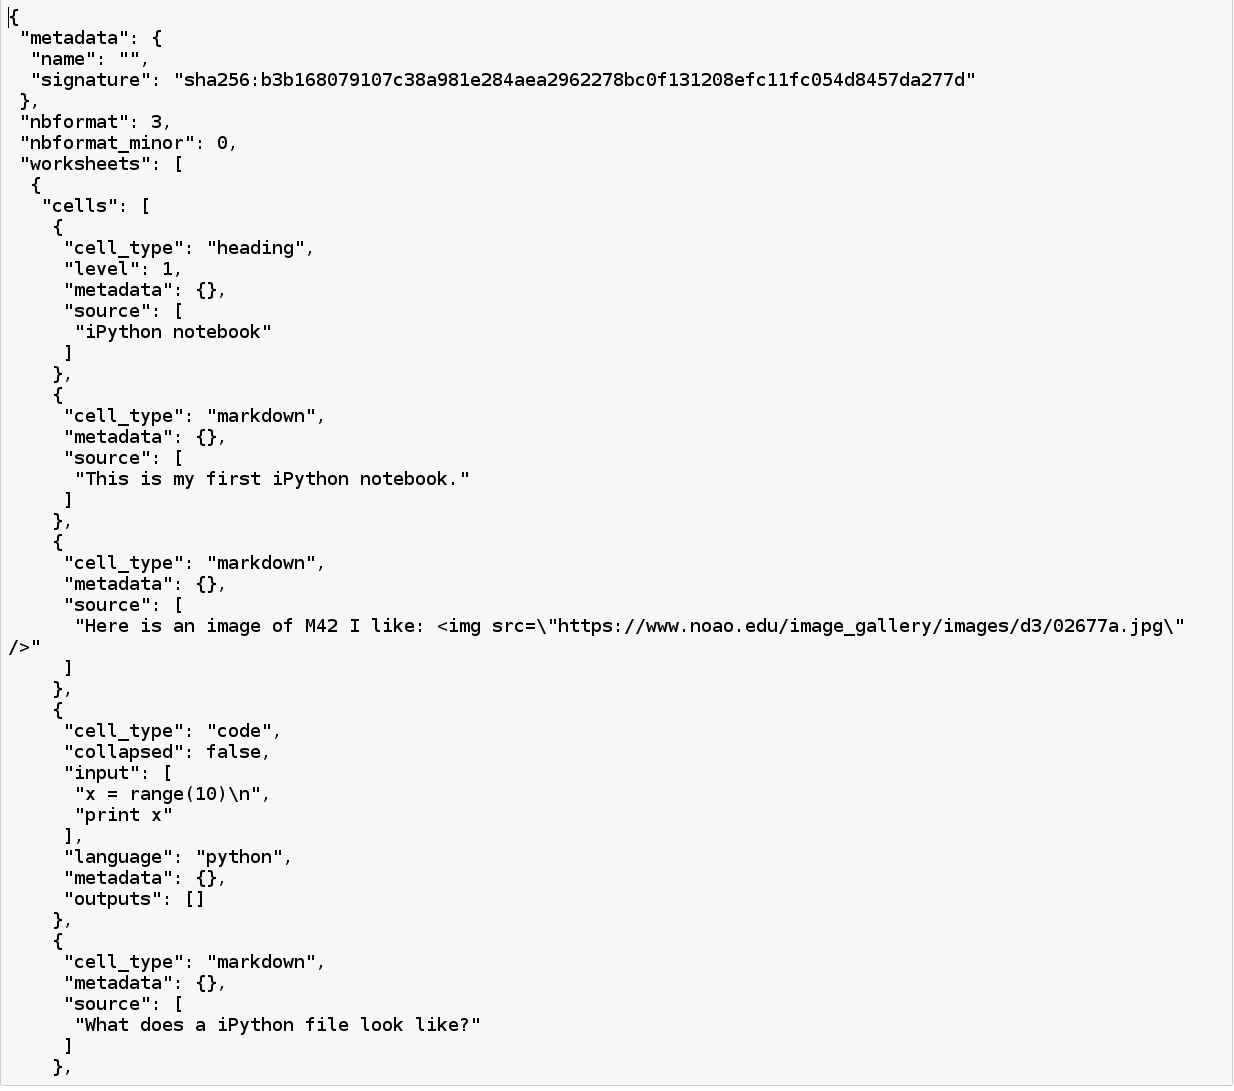

In [3]:
from IPython.display import Image
Image(filename='raw.png')

## NumPy examples

[NumPy](http://www.numpy.org) is the main Python package for working with N-dimensional arrays. Any list of numbers can be recast as a NumPy array:

In [4]:
import numpy as np
x = np.array([1, 5, 3, 4, 2])
x

array([1, 5, 3, 4, 2])

Arrays have a number of useful methods associated with them:

In [5]:
print(x.min(), x.max(), x.sum(), x.argmin(), x.argmax())

1 5 15 0 1


and NumPy functions can act on arrays in an elementwise fashion:

In [6]:
np.sin(x * np.pi / 180.)

array([ 0.01745241,  0.08715574,  0.05233596,  0.06975647,  0.0348995 ])

Ranges of values are easily produced:

In [7]:
np.arange(1, 10, 0.5)

array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
        6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

In [8]:
np.linspace(1, 10, 5)

array([  1.  ,   3.25,   5.5 ,   7.75,  10.  ])

In [9]:
np.logspace(1, 3, 5)

array([   10.        ,    31.6227766 ,   100.        ,   316.22776602,
        1000.        ])

Random numbers are also easily generated in the half-open interval [0, 1):

In [10]:
np.random.random(10)

array([ 0.31650799,  0.70216202,  0.84544881,  0.09661926,  0.60573023,
        0.61446569,  0.51908016,  0.77189718,  0.7798017 ,  0.35671057])

or from one of the large number of statistical distributions provided:

In [11]:
np.random.normal(loc = 2.5, scale = 5, size = 10)

array([  6.68095948,  10.16762916,   6.55623428,   2.5321643 ,
        10.58879435,  -1.70463637,   5.24420144,   0.37615209,
         6.43137245,  -5.18388403])

Another useful method is the **`where`** function for identifying elements that satisfy a particular condition:

In [12]:
x = np.random.normal(size = 300)
np.where(x > 2.)

(array([150, 176, 198, 214, 244, 254]),)

Of course, all of these work equally well with multidimensional arrays.

In [13]:
x = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
np.sin(x)

array([[ 0.84147098,  0.90929743,  0.14112001, -0.7568025 , -0.95892427],
       [-0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849, -0.54402111]])

## <font color = "crimson">Exercise 1:</font> <button type="button" class="btn btn-xs">10 pts</button>

Create two 4x4 matrices and use Python and Numpy to perform a matrix multiplication. Confirm your result and show your work.

In [14]:
import numpy as np
x = np.array([[0,1,2,1],
             [0,1,1,2],
             [0,1,0,1],
            [1,1,1,1]])
y = np.array([[0,1,0,1],
             [1,1,1,1],
             [0,2,1,2],
             [2,1,1,0]])
print(np.dot(x,y))

[[3 6 4 5]
 [5 5 4 3]
 [3 2 2 1]
 [3 5 3 4]]


## Looping

In the following exercises, we will implement loops.

### Sources of Error

With any algorithm, there are always two sources of error: *roundoff error* and *truncation error*. These errors can be exacerbated when looping.

#### Example: Roundoff error 

This arises from the error inherent in representing a floating point number
with a finite number of bits in the computer memory.  Look at the example below that demonstrates roundoff error.  Find $\epsilon$ that satisfies the equation $1 + \epsilon = 1$. You would think (in the analytical world) that it simply means $\epsilon = 0$.  However, in the numerical world we find that this equation is satisfied when the value of $\epsilon > 0$!  What is that strange value?  It is the limit of machine precision.  

Let's start with $\epsilon = 1$ and iterate, halving $\epsilon$ each time until in the computer representation $1 + \epsilon = 1$.  Try it (<kbd>shift</kbd>+<kbd>enter</kbd> to execute the cell below).

In [15]:
eps = 1.0
while 1.0 + eps != 1.0:
    eps = eps/2.
print(eps)

1.1102230246251565e-16


Why is `eps` not equal to zero? Should it be?

Now let's consider *truncation error*. Truncation error is a feature of an algorithm: we approximate an equation or function by expanding about some small quantity. By throwing away higher-order terms, we are truncating that expression and introducing an error in the representation. If the quantity we expand about is small, then the error is
small. But it is not always the case and we should be vareful.  

Look at the example below, to approximate the cosine function by the Taylor series:

$$\cos(x) = \sum_{k=0}^\infty (-1)^k {x^{2k} \over (2k)!}$$

#### Example: Truncation Error

First, we define a function that calculates the first ten terms of the expansion.  Look at the Python syntax.  It is quite readable.  The thing to notice is the indentation to the right after the **`def`** line.  Also, the first line imports a standard **`math`** library, which contains standard functions such as the factorial.

Now we can evaluate it at several values of x.  Let's choose $\pi/2$, $5\pi/2$, and $9\pi/2$, *for all of which the analytical answer is 0*.  Try it.

In [16]:
import math
def fn(x):
    f = 1.0
    for k in range(1, 20):
        f += (-1)**k*x**(2*k)/math.factorial(2.*k)
    return f
def fn2(x, kMax):
    f = 1.0
    kMax+=1
    for k in range(1, kMax):
        f += (-1)**k*x**(2*k)/math.factorial(2.*k)
    return f

In [17]:
pi = math.pi
print(fn(pi/2.), fn(pi*5./2.), fn(pi*9./2.))
print(fn2(pi/2., 10))

4.2539467343847745e-17 -7.505611766486443e-13 -0.011342981886815873
6.08176268469988e-17


The result may seem strange at first, but it should not surprise us.  All three arguments are greater than unity, and therefore convergence of the series is slow.  Especially, for $x = 9\pi/2 \approx 14$.

This is also a good place to think about the efficiency of our calculation.  Each new term in the series is based on the previous term, times an additional factor.  Since we know this property before making the calculation, we can utilize it to reduce the number of multiplications and speed up the code. Look at the function below.  We can use an internal Python routine to time our calculations and compare the speed of evaluation of the two functions.

In [18]:
print(fn(pi*9./2.))
%timeit -n 5000 fn(pi*9./2.)

-0.011342981886815873
5000 loops, best of 3: 14.5 µs per loop


## <font color = "crimson">Exercise 2:</font> <button type="button" class="btn btn-xs">10 pts</button>

Write code to find $k$ such that **`fn(x)`** converges (i.e., that by increasing $k$, the result no longer changes).

In [34]:
import math
pi = math.pi
def fn(x, kMax):
    f = 1.0
    kMax+=1
    for k in range(1, kMax):
        f += (-1)**k*x**(2*k)/math.factorial(2.*k)
    return f
x=100
kMax=1
while fn(x, kMax) - fn(x, kMax+1) != 0:
    kMax+=1
    
print(kMax)

122


## Reading in ascii data from a file

Data can also be automatically loaded from a file into a Numpy array via the **`loadtxt`** or **`genfromtxt`** methods. Make sure you have the datafile `andreon_tab1.csv`. in your working directory, or specify your path, or append a path to the system. *Note that if you reset your path, you must reload NumPy in order for loadtxt to see the revision.*

In [33]:
import numpy as np
dt =  [('m200',float),('m200e',float),('obstot1',int),('obsbkg1',int), 
    ('c',float)]
data1 = np.loadtxt('andreon_tab1.csv', dtype=dt, skiprows=(1), 
                   usecols=(11,12,1,2,3), delimiter=',')
from subprocess import check_output
from pprint import pprint
pprint(check_output(['more', 'andreon_tab1.csv']))

(b'NAME,          obstot1, obsbkg1, c1, obstot2, c2, n200,r500,  r200, rt,     '
 b'rmax, m200,m200e  ,mt,mte, ratio, ra, dec, z, lx43, cat, tx,vdisp, vdispp, v'
 b'dispm,class,rcomp\nA0160,28,13, 3.107, 29, 2.951,31,  0.46, 0.67, 2.70,  '
 b'1.31, 0.68, 0.38,  0.80, 0.54, 1.17,18.27410, 15.51700,0.0432,0.092 , NOR,  '
 b' 2.70,489, 62,45,2, 0.7\nA0602,45,37, 3.186, 23, 10.77,29, 0.84, 1.23, 5.'
 b'45,  2.32, 4.34, 0.44,  6.57, 0.66, 1.51,118.35100, 29.36600,0.0606,0.289 , '
 b'BCS,   0.00,712, 81,60,2, 2.0 \nA0671,44,20, 2.545, 36, 5.443,37, 0.76, 1'
 b'.12, 4.76,  3.94, 3.23, 1.02,  4.40, 1.49, 1.36,127.16210, 30.42800,0.0503,0'
 b'.205 , NOR,   0.00,854, 72,57,2,11.8\nA0779,27,0 ,0.2245, 19, 0.4303,29, '
 b'0.64, 0.92, 3.89,  2.12, 1.80, 0.30,  2.40, 0.46, 1.33,139.92200, 33.76300,0'
 b'.0233,0.024,  eBCS,  1.92,528, 45,36,2, 2.2\nA0957,33,20, 4.605, 26, 7.94'
 b'7,29, 0.64, 0.88, 3.37,  0.71, 1.58, 0.98,  1.55, 0.96, 0.98,153.41790 ,-0.9'
 b'1440,0.0455,0.223 , REF,   0.00,763, 85,

In [34]:
print(data1['m200'])

[ 0.68  4.34  3.23  1.8   1.58  0.59  4.46  1.09  4.68  3.46  2.19  0.95
  2.37  2.06  2.67  2.73  1.72  1.31  2.76  0.86  1.67  0.73  2.5   1.79
  3.99  0.58  2.92  0.57  0.34  1.59  6.03  1.98  0.38  1.32  4.5   0.44
  1.65  5.27  0.41  1.74  6.06  3.38  1.05  0.79  0.73  2.39  5.33  4.31
  7.51  1.52  1.01  1.44  1.88]


## Matplotlib visualization exercises

/usr/local/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


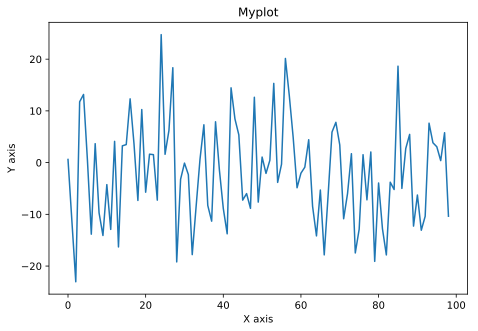

In [35]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (7.5, 5.0) # Make plots bigger
x = np.arange(0,99,dtype=float)
y = np.random.normal(0,10,(99,))
plt.plot(x,y)
plt.ylabel('Y axis')
plt.xlabel('X axis')
plt.title('Myplot')
plt.show()

Side by side panels:

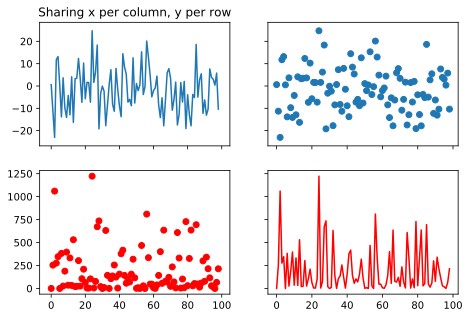

In [36]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(x, y)
ax1.set_title('Sharing x per column, y per row')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
ax4.plot(x, 2 * y ** 2 - 1, color='r')
plt.show() # OR plt.savefig('sine_function_legend.png')

Including errors:

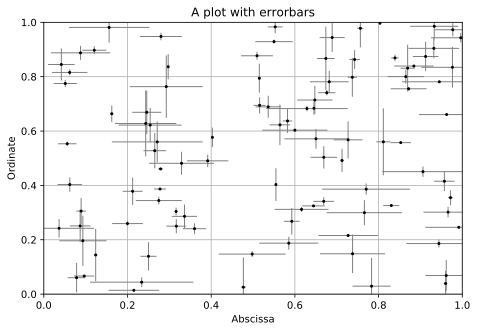

In [37]:
x, y = np.random.random([2, 100])
xerr = np.random.normal(0., 0.05, 100)
yerr = np.random.normal(0., 0.05, 100)
plt.errorbar(x, y, xerr, yerr, fmt = '.k', 
                ecolor = 'gray', lw = 1, ms = 4)
plt.xlabel('Abscissa')
plt.ylabel('Ordinate')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.grid(True)
plt.title('A plot with errorbars')

3D visualizations:

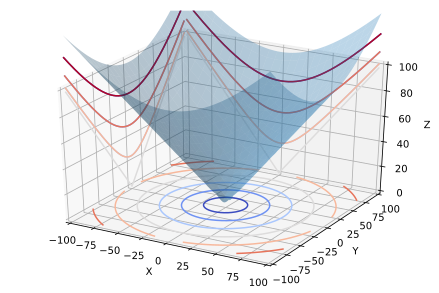

In [38]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def fun(x, y):
     return np.sqrt(pow(x,2) + pow(y,2))

x = y = np.arange(-99,99,dtype=float)
X, Y = np.meshgrid(x, y)
zs = np.array([fun(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3, 
                label = 'Euclidean Distance')
cset = ax.contour(X, Y, Z, zdir='z', offset=0, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-100, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=100, cmap=cm.coolwarm)
ax.set_xlabel('X')
ax.set_xlim(-100, 100)
ax.set_ylabel('Y')
ax.set_ylim(-100, 100)
ax.set_zlabel('Z')
ax.set_zlim(0, 100)
plt.show()

Let's make a simple histogram. What should these data look like?

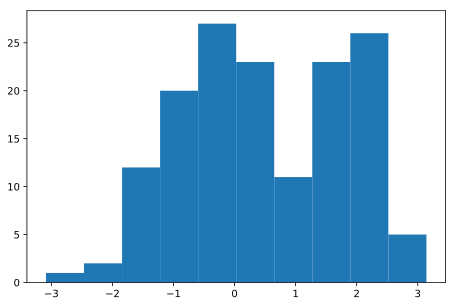

In [39]:
x = np.concatenate([np.random.normal(0., 1., 100), 
                    np.random.normal(2, 0.5, 50)])
plt.hist(x)
plt.show()

## Scientific Python (SciPy) examples

Let's perform a definite integral:

$$\int_{1000}^{\infty}\frac{dx}{100x^3}$$

In [40]:
import scipy as sp
from scipy.integrate import quad

def f(x):
    return 0.01*x**-3

integral, error = quad(f, 1000, sp.inf, epsrel = 1e-6,epsabs = 0)
print(integral, error)

5e-09 4.036193611405873e-18


How do we fit a curve to some data? Let's read in a data file and fit a Gaussian to its contents:

/usr/local/anaconda/envs/python3/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


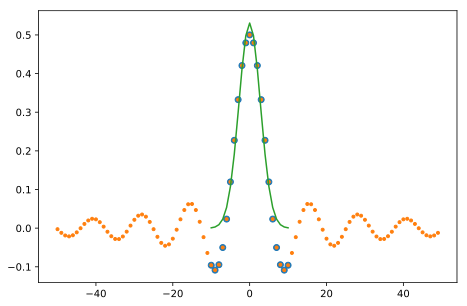

In [41]:
import numpy as np
dt = [('x',float), ('y',float)]
data = np.loadtxt('data1.txt', dtype=dt, skiprows=(1))      
x = data['x']
y = data['y']
index_array = np.where((x >= -10) & (x <= 10))
x0 = x[index_array]
y0 = y[index_array]    

from scipy.optimize import curve_fit
def gauss(x, *p):                                                             
        A, mu, sigma = p
        return A*np.exp(-(x-mu)**2/(2.*sigma**2))
p0 = [1., 0., 1.]
coeff, var_matrix = curve_fit(gauss, x0, y0, p0=p0)
hist_fit = gauss(x0, *coeff)
plt.plot(x0,y0,'o')
plt.plot(x,y,'.')
plt.plot(x0,hist_fit,label='Fitted Data')
plt.show()

## Reading and Plotting Astronomical Image Data

Make sure you have the file `phiand.fits` in your working directory.

Filename: phiand.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       6   (256, 256)   float32   


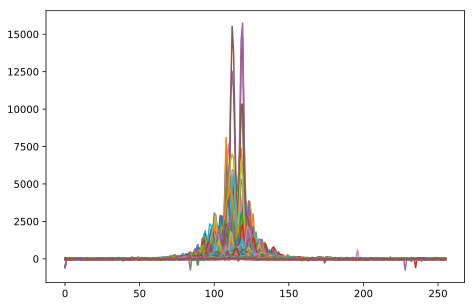

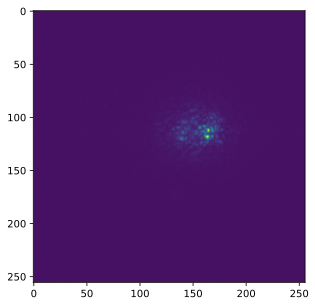

In [42]:
from astropy.io import fits
image = fits.info('phiand.fits')
image
data = fits.getdata('phiand.fits')
plt.plot(data)
plt.show() # what is this?
plt.imshow(data)
plt.show()

What do the above two panels represent?

Now, let's smooth the second image with a Gaussian kernal:

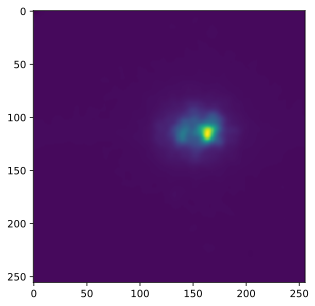

In [43]:
from scipy import ndimage
blurred_data = ndimage.gaussian_filter(data,sigma=3)
plt.imshow(blurred_data)
plt.show()

Do you see one or two objects (or more?) in the above image?

## <font color = "crimson">Exercise 3:</font>  <button type="button" class="btn btn-xs">20 pts</button>
 
Read in the image called `andromeda_rot.fits`. Make a side-by-side 2-panel figure. The left panel should show the 2D representation of the pixels along with isocontours. The right panel should show a 2D Gaussian fit to the pixel intensities (hint: go to the SciPy cookbook and search for 2D Gaussian). Make the labels be in arcseconds (not pixels). In order to switch from pixels to arcseonds, you will need to extract the image tick values and use the known fact that every pixel is 1.7 arcseconds (the resolution of the instrument).

**Extra Credit**:  <button type="button" class="btn btn-xs">5 pts</button> Re-do the Gaussian fit, but now solve for the rotation angle of the 2D Gaussian (i.e., the covariance).

Filename: andromeda_rot.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      53   (510, 340)   int16 (rescales to uint16)   


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


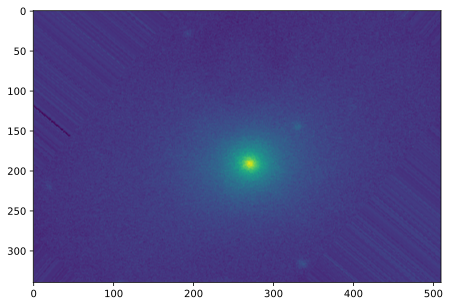

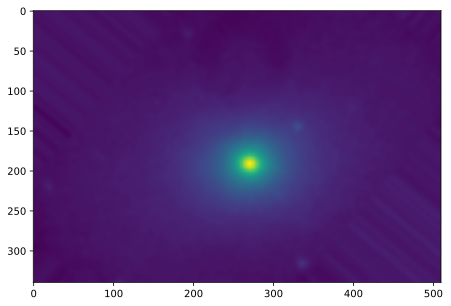

In [49]:
from astropy.io import fits
image = fits.info('andromeda_rot.fits')
image
data = fits.getdata('andromeda_rot.fits')
plt.plot(data)
plt.show()
plt.imshow(data)
plt.show()

from scipy import ndimage
blurred_data = ndimage.gaussian_filter(data,sigma=3)
plt.imshow(blurred_data)
plt.show()

## <font color = "crimson" >Exercise 4:</font> <button type="button" class="btn btn-xs">10 pts</button>

Create a BitBucket repository (called Introduction).  Ininitialize a new Git directory on your computer.  Within it, create a new Jupyter notebook that contains the above three exercises. Commit and push your notebook into your BitBucket repository.  *Make sure you save your notebook before commiting with <kbd>⌘</kbd>-<kbd>S</kbd> / <kbd>Ctrl</kbd>-<kbd>S</kbd> in Mac/Windows, respectively.* Give the instructors access to this repo (usernames: **jdmonnier**, **mm_cra**, and **bensetterholm**). The instructors will check out your code and run it.

---

Congratulations, you have come to the end of the lab!  Please submit your lab report to canvas as an html file.

In Jupyter, select: File &blacktriangleright; Download as &blacktriangleright; HTML (.html)